# 1. Data input

### 1.1 Read the metadata table (clusters_df): strain name and paths of their mortality data .pickles

In [1]:
import os, pandas
%cd '/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures'
csv_df = pandas.read_csv('MS 1 Microfluidics - analysis of clusters - Keio collection __ kan BW25113 background.csv',sep=',')
clusters_df = csv_df.drop([0,1])
clusters_df = clusters_df.iloc[:,:-1]
clusters_df.columns = ['genotype','url','cluster']
clusters_df = clusters_df[clusters_df['url']!='in progress']
clusters_df = clusters_df[clusters_df['url'].isnull()==False]

import urlparse, urllib
from os import path
for i in range(len(clusters_df)):
    url_parsed = urlparse.urlparse(clusters_df.iloc[i]['url'])
    relative_path = urllib.unquote('/'.join(url_parsed.path.split('/')[5:])).decode('utf8')
    clusters_df.loc[clusters_df.index[i], 'path'] = relative_path
    strain_name = url_parsed.path.split('/')[-1]
    clusters_df.loc[clusters_df.index[i], 'strain'] = strain_name


[Errno 2] No such file or directory: '/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures'
/home/xsong/Desktop/ms2_post_analysis


### 1.2 Locate mortality clusters

In [2]:
clusters_df

,genotype,url,cluster,path,strain
2,WT,https://github.com/CyberCRI/coliSurvivalAnalys...,0,xsong/Microfluidics Database/WT,WT
3,ΔabgR::Kan,https://github.com/CyberCRI/coliSurvivalAnalys...,0,xsong/Microfluidics Database/abgR,abgR
4,ΔaceF::Kan,https://github.com/CyberCRI/coliSurvivalAnalys...,0,xsong/Microfluidics Database/aceF,aceF
5,ΔagaR::Kan,https://github.com/CyberCRI/coliSurvivalAnalys...,0,xsong/Microfluidics Database/agaR,agaR
6,ΔagaV::Kan,https://github.com/CyberCRI/coliSurvivalAnalys...,0,xsong/Microfluidics Database/agaV_new,agaV_new
7,ΔalsB::Kan,https://github.com/CyberCRI/coliSurvivalAnalys...,1,xsong/main/test dataset/14.12.2018/alsB_repeat,alsB_repeat
8,ΔappA::Kan,https://github.com/CyberCRI/coliSurvivalAnalys...,0,xsong/main/test dataset/ana 23072018/appA,appA
9,ΔappB::Kan,https://github.com/CyberCRI/coliSurvivalAnalys...,0,xsong/main/test dataset/ana 23072018/appB,appB
10,ΔappY::Kan,https://github.com/CyberCRI/coliSurvivalAnalys...,0,xsong/Microfluidics Database/appY,appY
11,ΔaqpZ::Kan,https://github.com/CyberCRI/coliSurvivalAnalys...,0,xsong/Microfluidics Database/aqpZ,aqpZ


In [2]:
%cd '/Users/yyfwuhan/Projects/2014-TaMaRa-hamburger-chip-PI-profile-mortality-summary/PIMortalityAnalysis'

/Users/yyfwuhan/Projects/2014-TaMaRa-hamburger-chip-PI-profile-mortality-summary/PIMortalityAnalysis


In [3]:
import re
for ind in clusters_df.index:
    re_mortality1 = re.compile('(.*) mortality_dataframe_cluster(\d).pickle')
    re_mortality2 = re.compile('(.*)_mortality_dataframe_cluster(\d).pickle')
    re_mortality = re.compile('(.*?.)mortality_dataframe_cluster(\d).pickle')
    matches1 = [fn for fn in os.listdir(clusters_df.loc[ind,'path']) if re.match(re_mortality1, fn)]
    matches2 = [fn for fn in os.listdir(clusters_df.loc[ind,'path']) if re.match(re_mortality2, fn)]
    matches = (matches1, matches2)[len(matches1) == 0]
    if len(set([re.match(re_mortality, fn).groups()[0] for fn in matches]))>1:
            raise Exception(matches)
    if len(matches) < int(clusters_df.loc[ind,'cluster']):
        raise Exception(matches.__str__)
    basename = re.match(re_mortality, matches[0]).groups()[0]
    clusters_df.loc[ind, 'basename'] = basename

### 1.3 Filter out cluster choice mistakes

In [4]:
from os import path
for ind in clusters_df.index:
    re_mortality = re.compile(clusters_df.loc[ind, 'basename']+'mortality_dataframe_cluster'+'\d'+'.pickle')
    matches = [fn for fn in os.listdir(clusters_df.loc[ind,'path']) if re.match(re_mortality, fn)]
    if len(matches)-1 < int(clusters_df.loc[ind,'cluster']):
        print 'Droped: ',clusters_df.loc[ind,'path'], matches, clusters_df.loc[ind,'cluster']
        clusters_df.drop(ind,inplace=True)

### 1.4 Drop data known to not fit GGM

In [5]:
print clusters_df.loc[33,:]
clusters_df.drop(33,inplace=True)

genotype                                           ΔlipA::Kan
url         https://github.com/CyberCRI/coliSurvivalAnalys...
cluster                                                     1
path        xsong/main/test dataset/Github analysis of 170...
strain                                                   lipA
basename                                        CR-TA_lipA-1_
Name: 33, dtype: object


In [6]:
print clusters_df.loc[55,:]
clusters_df.drop(55,inplace=True)

genotype                                           ΔyagR::Kan
url         https://github.com/CyberCRI/coliSurvivalAnalys...
cluster                                                     0
path        xsong/main/test dataset/Missing microfluidics ...
strain                                                   yagR
basename                                        CR-TA_yagR-1_
Name: 55, dtype: object


In [7]:
print clusters_df.loc[58,:]
clusters_df.drop(58,inplace=True)

genotype                                           ΔybiT::Kan
url         https://github.com/CyberCRI/coliSurvivalAnalys...
cluster                                                     1
path        xsong/main/test dataset/Missing microfluidics ...
strain                                                   ybiT
basename                                        CR-TA_ybiT-1_
Name: 58, dtype: object


In [8]:
print clusters_df.loc[59,:]
clusters_df.drop(59,inplace=True)

genotype                                           ΔycaL::Kan
url         https://github.com/CyberCRI/coliSurvivalAnalys...
cluster                                                     0
path                        xsong/Microfluidics Database/ycaL
strain                                                   ycaL
basename                                                ycaL 
Name: 59, dtype: object


In [9]:
print clusters_df.loc[67,:]
clusters_df.drop(67,inplace=True)

genotype                                           ΔyigL::Kan
url         https://github.com/CyberCRI/coliSurvivalAnalys...
cluster                                                     0
path                        xsong/Microfluidics Database/yigL
strain                                                   yigL
basename                                                yigL 
Name: 67, dtype: object


### 1.5 Load mortality .pickles

In [10]:
import pickle
import numpy as np
import pandas as pd
dfs_mortality = dict()
tgs_mortality = dict()
for ind in clusters_df.index:
    fn_mortality = path.join(clusters_df.loc[ind,'path'], clusters_df.loc[ind,'basename']+'mortality_dataframe_cluster'+clusters_df.loc[ind,'cluster']+'.pickle' )
    fn_timegrid = path.join(clusters_df.loc[ind,'path'], clusters_df.loc[ind,'basename']+'relative_timegrid_cluster'+clusters_df.loc[ind,'cluster']+'.pickle' )
    dfs_mortality[clusters_df.loc[ind,'strain']] = pickle.load( open(fn_mortality, 'r') )
    tg = pickle.load( open(fn_timegrid, 'r') )
    tgs_mortality[clusters_df.loc[ind,'strain']] = np.array(pd.Series(tg)[tg<=np.max(dfs_mortality[clusters_df.loc[ind,'strain']]['mortality'])])

# 2. Redo statistical mortality analysis and quality control

### 2.1 Fit to GG or GGM

In [11]:
from cohortMortalitySummary import GGMfit, GGfit
GGM_fitted = dict()
GG_fitted = dict()
Fitted = dict()
for ind in clusters_df.index:
    GGM_fitted[clusters_df.loc[ind,'strain']] = GGMfit(dfs_mortality[clusters_df.loc[ind,'strain']])
    try:
        GG_fitted[clusters_df.loc[ind,'strain']] = GGfit(dfs_mortality[clusters_df.loc[ind,'strain']])
        if GG_fitted[clusters_df.loc[ind,'strain']]['AIC'] < GGM_fitted[clusters_df.loc[ind,'strain']]['AIC']:
            Fitted[clusters_df.loc[ind,'strain']] = GG_fitted[clusters_df.loc[ind,'strain']]
            Fitted[clusters_df.loc[ind,'strain']]['type'] = 'GG'
            print clusters_df.loc[ind,'strain'] + ': GG'
        else:
            Fitted[clusters_df.loc[ind,'strain']] = GGM_fitted[clusters_df.loc[ind,'strain']]
            Fitted[clusters_df.loc[ind,'strain']]['type'] = 'GGM'
            print clusters_df.loc[ind,'strain'] + ': GGM'
    except:
        Fitted[clusters_df.loc[ind,'strain']] = GGM_fitted[clusters_df.loc[ind,'strain']]
        Fitted[clusters_df.loc[ind,'strain']]['type'] = 'GGM'
        print clusters_df.loc[ind,'strain'] + ': GGM'

WT: GG
abgR: GG
aceF: GG
agaR: GG
agaV_new: GG
alsB_repeat: GG
appA: GG
appB: GG
appY: GGM
aqpZ: GGM
arcA: GGM
ascG: GG
barA: GG
bipA: GG
brnQ_new: GG
caiT_new: GGM
crcA: GG
crp%20k-: GGM
dnaT_new: GG
eptB: GG
fepG: GG
fkpA: GG
hchA: GG
hns: GG
hptG: GGM
hyaA: GG
kdpF_new: GG


/Users/yyfwuhan/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in optim(method = "BFGS", par = c(4.60517018598809, -2.30258509299405,  : 
  non-finite finite-difference value [3]

  warnings.warn(x, RRuntimeWarning)
/Users/yyfwuhan/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Users/yyfwuhan/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: There were 50 or more warnings (use warnings() to see the first 50)
  warnings.warn(x, RRuntimeWarning)
/Users/yyfwuhan/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)


lipB: GGM
lpd: GG
moaE: GG
ompL_new: GG
pfkA: GG
pgi: GG
pnp: GG
prpR: GGM
pspB: GG
ptsH: GG
puuB: GG
recF: GG
rsxC: GG
sspA: GG
thiQ_new: GG
treC: GG
uxaB_new: GGM
wcaM_new: GG
yafX: GGM
yagS: GG
yagT: GG
ychF: GG
ydcY: GG
yecI: GG
yecP: GGM
yehY: GG
yfiD_new: GGM
yggJ: GG
yihS_new: GGM
yjeB: GG
yjgH: GG
yjhG: GG
ykfF: GG
ytfH_new: GGM
caiA: GGM
uxaA: GG


### 2.2 Generate bootstrapped statistics: Medians, GGM parameters

In [12]:
from cohortMortalitySummary import rflexsurv, globalenv, ro, pandas2ri
import numpy as np
flexsurvreg = rflexsurv.flexsurvreg
normboot = rflexsurv.normboot_flexsurvreg
ro.r.source(os.path.join( 'Rmodels', 'GammaGompertz.R'), echo=False,verbose=False);
ro.r.source(os.path.join( 'Rmodels', 'GammaGompertzMakeham.R'), echo=False,verbose=False);
qgammagompertz = globalenv['qgammagompertz']
pgammagompertzmakeham = globalenv['pgammagompertzmakeham']
def gg_med(para):
    return np.array(qgammagompertz(0.5,
                        para['beta'],
                        para['s'],
                        para['rate']))[0]

def ggm_med(para, precision=0.1, max_t = 150):
    ptime = np.arange(0,max_t,precision)
    rtime = ro.Vector(ptime)
    probs = np.array(pgammagompertzmakeham(rtime,para['rate'],
                                            para['beta'],
                                            para['s'],
                                            para['lambda']))
    while probs[-1]<0.5:
        ptime = np.arange(max_t, max_t+100, precision)
        rtime = ro.Vector(ptime)
        probs = np.array(pgammagompertzmakeham(rtime,para['rate'],
                                            para['beta'],
                                            para['s'],
                                            para['lambda']))
        max_t += 100
    return ptime[probs>=0.5][0]
    

In [13]:
import pandas as pd
stats = dict()
for strain in Fitted.keys():
    print strain
    paras = pandas2ri.ri2py(normboot(Fitted[strain]['flexsurvreg'],B=50000))
    if Fitted[strain]['type'] == 'GGM':
        stats[strain]=pd.DataFrame(data=paras,columns=['rate','beta','s','lambda'])
    elif Fitted[strain]['type'] == 'GG':
        stats[strain]=pd.DataFrame(data=paras,columns=['beta','s','rate'])
        stats[strain]['lambda'] = pd.Series([0]*len(paras))
    meds = [(ggm_med(dict(stats[strain].iloc[i,:])), gg_med(dict(stats[strain].iloc[i,:])))[Fitted[strain]['type'] == 'GG'] for i in range(len(paras))]
    stats[strain]['median'] = pd.Series(data=meds)

rsxC
alsB_repeat
appY
yggJ
moaE
aqpZ
pspB
pgi
bipA
WT
prpR
yecI
fepG
appB
appA
ykfF
lipB
yihS_new
ytfH_new
ompL_new
aceF
hchA
sspA
barA
fkpA
ydcY
yafX
abgR
yagT
yagS
eptB
brnQ_new
yjgH
yjhG
kdpF_new
hptG
puuB
pnp
treC
uxaB_new
agaR
ychF
caiA
yecP
yjeB
thiQ_new
pfkA
caiT_new
hyaA
yehY
ptsH
recF
agaV_new
wcaM_new
hns
crcA
crp%20k-
arcA
uxaA
ascG
lpd
yfiD_new
dnaT_new


### 2.3 Goodness-of-fit by K-S statistics & quality control

In [14]:
from cohortMortalitySummary import KSm_gof, KSm_test
KStests = dict()
for strain in Fitted.keys():
    data = dfs_mortality[strain]
    rtg = tgs_mortality[strain]
    sf = Fitted[strain]['ML_survivorship']
    residues = KSm_gof(data, rtg, sf)
    KStests[strain] = KSm_test(residues[0], residues[1], alpha=0.01)

### These data cross K-S thresholds, but only in very few time points, thus pass quality control

In [15]:
for strain in Fitted.keys():
    if KStests[strain][0] > 1.517:
        print strain, KStests[strain]

rsxC KstestResult(statistic=1.5691549012461368, pvalue=0.014532801272589737, critical_stat=1.6276236307187291)
appY KstestResult(statistic=1.5748447672321013, pvalue=0.014020087069378425, critical_stat=1.6276091010358962)
barA KstestResult(statistic=1.5755178895215127, pvalue=0.013962696240715907, critical_stat=1.6276236307187291)
hptG KstestResult(statistic=1.8291706163285404, pvalue=0.0024822667932998077, critical_stat=1.6276236307187291)


### Mortality cluster with too few imaging positions, dropped later

In [16]:
for strain in dfs_mortality.keys():
    if len(np.unique(dfs_mortality[strain]['fn'])) < 3:
        print strain

recF


### 2.4 Important Quantiles

In [67]:
def gg_q(q, para):
    return np.array(qgammagompertz(q,
                        para['beta'],
                        para['s'],
                        para['rate']))[0]

def ggm_q(q, para, precision=0.1, max_t = 150):
    ptime = np.arange(0,max_t,precision)
    rtime = ro.Vector(ptime)
    probs = np.array(pgammagompertzmakeham(rtime,para['rate'],
                                            para['beta'],
                                            para['s'],
                                            para['lambda']))
    while probs[-1]<q:
        ptime = np.arange(max_t, max_t+100, precision)
        rtime = ro.Vector(ptime)
        probs = np.array(pgammagompertzmakeham(rtime,para['rate'],
                                            para['beta'],
                                            para['s'],
                                            para['lambda']))
        max_t += 100
    return ptime[probs>=q][0]
quantiles = dict()
for strain in Fitted.keys():
    print strain+': '+Fitted[strain]['type']
    paras = pandas2ri.ri2py(normboot(Fitted[strain]['flexsurvreg'],B=5000))
    if Fitted[strain]['type'] == 'GGM':
        quantiles[strain]=pd.DataFrame(data=paras,columns=['rate','beta','s','lambda'])
    elif Fitted[strain]['type'] == 'GG':
        quantiles[strain]=pd.DataFrame(data=paras,columns=['beta','s','rate'])
        quantiles[strain]['lambda'] = pd.Series([0]*len(paras))
    for q in [0.1,0.25,0.5,0.75,0.9]:
        #print q
        qs = [(ggm_q(q, dict(quantiles[strain].iloc[i,:])), gg_q(q,dict(quantiles[strain].iloc[i,:])))[Fitted[strain]['type'] == 'GG'] for i in range(len(paras))]
        quantiles[strain]['q='+str(q)] = pd.Series(data=qs, index=quantiles[strain].index)

rsxC: GG
alsB_repeat: GG
appY: GGM
yggJ: GG
moaE: GG
aqpZ: GGM
pspB: GG
pgi: GG
bipA: GG
WT: GG
prpR: GGM
yecI: GG
fepG: GG
appB: GG
appA: GG
ykfF: GG
lipB: GGM
yihS_new: GGM
ytfH_new: GGM
ompL_new: GG
aceF: GG
hchA: GG
sspA: GG
barA: GG
fkpA: GG
ydcY: GG
yafX: GGM
abgR: GG
yagT: GG
yagS: GG
eptB: GG
brnQ_new: GG
yjgH: GG
yjhG: GG
kdpF_new: GG
hptG: GGM
puuB: GG
pnp: GG
treC: GG
uxaB_new: GGM
agaR: GG
ychF: GG
caiA: GGM
yecP: GGM
yjeB: GG
thiQ_new: GG
pfkA: GG
caiT_new: GGM
hyaA: GG
yehY: GG
ptsH: GG
recF: GG
agaV_new: GG
wcaM_new: GG
hns: GG
crcA: GG
crp%20k-: GGM
arcA: GGM
uxaA: GG
ascG: GG
lpd: GG
yfiD_new: GGM
dnaT_new: GG


# 3. Aging parameters basics: first figures

### 3.1 Set basic info for plotting: strain aging parameters dataframe (strain_df) and strain categories

In [68]:
strain_df = pd.DataFrame(index=Fitted.keys(), columns=['med_exp','med_model','scale','med_ratio','scale_ratio'])
for strain in Fitted.keys():
    strain_df.loc[strain,'med_model'] = float(np.median(stats[strain]['median']))
    strain_df.loc[strain,'med_ratio'] = float(np.median(stats[strain]['median'])/np.median(stats['WT']['median']))
    strain_df.loc[strain,'scale'] = float(1/Fitted[strain]['model_paras'].loc['rate','est'])
    strain_df.loc[strain,'scale_ratio'] = float(Fitted['WT']['model_paras'].loc['rate','est']/Fitted[strain]['model_paras'].loc['rate','est'])
    strain_df.loc[strain,'rate'] = Fitted[strain]['model_paras'].loc['rate','est']
    strain_df.loc[strain,'rate_L95%'] = Fitted[strain]['model_paras'].loc['rate','L95%']
    strain_df.loc[strain,'rate_U95%'] = Fitted[strain]['model_paras'].loc['rate','U95%']
    strain_df.loc[strain,'beta'] = Fitted[strain]['model_paras'].loc['beta','est']
    strain_df.loc[strain,'beta_L95%'] = Fitted[strain]['model_paras'].loc['beta','L95%']
    strain_df.loc[strain,'beta_U95%'] = Fitted[strain]['model_paras'].loc['beta','U95%']
    strain_df.loc[strain,'s'] = Fitted[strain]['model_paras'].loc['s','est']
    strain_df.loc[strain,'s_L95%'] = Fitted[strain]['model_paras'].loc['s','L95%']
    strain_df.loc[strain,'s_U95%'] = Fitted[strain]['model_paras'].loc['s','U95%']
    strain_df.loc[strain,'model type'] = Fitted[strain]['type']
    if Fitted[strain]['type'] == 'GGM':
        strain_df.loc[strain,'lambda'] = Fitted[strain]['model_paras'].loc['lambda','est']
        strain_df.loc[strain,'lambda_L95%'] = Fitted[strain]['model_paras'].loc['lambda','L95%']
        strain_df.loc[strain,'lambda_U95%'] = Fitted[strain]['model_paras'].loc['lambda','U95%']
    elif Fitted[strain]['type'] == 'GG':
        strain_df.loc[strain,'lambda'] = 0
        strain_df.loc[strain,'lambda_L95%'] = 0
        strain_df.loc[strain,'lambda_U95%'] = 0

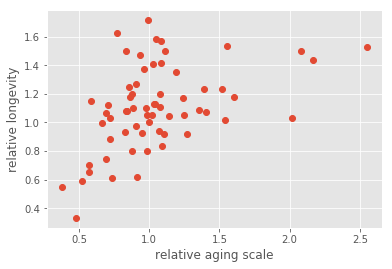

In [19]:
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
#import seaborn as sns
plt.plot(strain_df['scale_ratio'], strain_df['med_ratio'],'o')
#plt.xscale('log')
plt.xlabel('relative aging scale')
#plt.yscale('log')
plt.ylabel('relative longevity')

### 3.2 Aging parameter space: lifespan, aging timescale, shape

__**shape = lifespan / scale**__

In [20]:
candidates = ['ompL_new','pgi','uxaB_new','aqpZ','ascG','caiT_new','yagS','yfiD_new', 'appY']

strain_df['scale_ratio_log2'] = [np.log2(float(r)) for r in strain_df['scale_ratio']]
strain_df['lifespan_ratio_log2'] = [np.log2(float(r)) for r in strain_df['med_ratio']]
strain_df['shape_ratio_log2'] = [np.log2(float(r)) for r in strain_df['med_ratio']/strain_df['scale_ratio']]

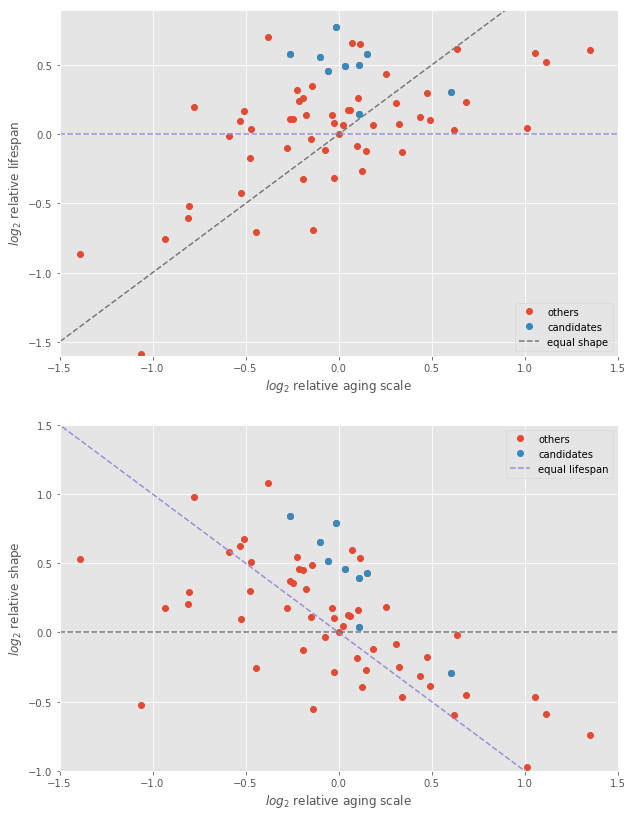

In [21]:
f, (ax1, ax2) = plt.subplots(2, sharex=False)

ax1.plot(strain_df['scale_ratio_log2'], 
         strain_df['lifespan_ratio_log2'],
         'o',label='others')
ax1.plot(strain_df.loc[candidates, 'scale_ratio_log2'],
         strain_df.loc[candidates, 'lifespan_ratio_log2'], 'o', label='candidates')
ax1.set_ylabel('$log_2$ relative lifespan')
ax1.set_xlabel('$log_2$ relative aging scale')
ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df['scale_ratio_log2'], 
         strain_df['shape_ratio_log2'],
         'o',label='others')
ax2.plot(strain_df.loc[candidates, 'scale_ratio_log2'],
         strain_df.loc[candidates, 'shape_ratio_log2'], 'o', label='candidates')
ax2.set_xlabel('$log_2$ relative aging scale')
ax2.set_ylabel('$log_2$ relative shape ')
ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '--', label='equal lifespan')
ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--')
ax2.legend(loc=1)

ax1.set_xlim([-1.5,1.5])
ax2.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.6,0.9])
ax2.set_ylim([-1,1.5])


f.set_size_inches(10,14)

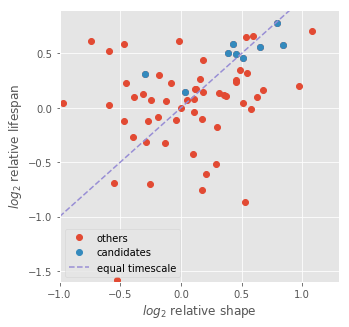

In [22]:
f, (ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df['shape_ratio_log2'], 
         strain_df['lifespan_ratio_log2'],
         'o',label='others')
ax1.plot(strain_df.loc[candidates, 'shape_ratio_log2'],
         strain_df.loc[candidates, 'lifespan_ratio_log2'], 'o', label='candidates')
ax1.set_xlabel('$log_2$ relative shape')
ax1.set_ylabel('$log_2$ relative lifespan')
ax1.plot(np.arange(-1,1.5,0.1), np.arange(-1,1.5,0.1), '--', label='equal timescale')
ax1.legend(loc=3)

ax1.set_ylim([-1.6,0.9])
ax1.set_xlim([-1,1.3])


f.set_size_inches(5,5)

### 3.3 Longevity strains as candidate strains

In [23]:
strain_df.loc[candidates,['scale_ratio_log2','lifespan_ratio_log2','shape_ratio_log2']]

,scale_ratio_log2,lifespan_ratio_log2,shape_ratio_log2
ompL_new,0.111602,0.501396,0.389794
pgi,0.109578,0.145258,0.035679
uxaB_new,-0.055715,0.459123,0.514838
aqpZ,-0.013368,0.778168,0.791536
ascG,-0.097212,0.557840,0.655053
caiT_new,0.035362,0.493271,0.457909
yagS,0.603758,0.307017,-0.296741
yfiD_new,0.152325,0.583213,0.430888
appY,-0.259866,0.581891,0.841757


In [24]:
strain_df.loc[strain_df['lifespan_ratio_log2']>0.4,['scale_ratio_log2','lifespan_ratio_log2','shape_ratio_log2']]

,scale_ratio_log2,lifespan_ratio_log2,shape_ratio_log2
appY,-0.259866,0.581891,0.841757
aqpZ,-0.013368,0.778168,0.791536
appB,1.114578,0.525785,-0.588792
appA,0.635415,0.619212,-0.016203
ompL_new,0.111602,0.501396,0.389794
yafX,0.112884,0.652847,0.539963
yagT,1.055104,0.585007,-0.470097
yjhG,0.070029,0.662383,0.592354
hptG,-0.379869,0.703560,1.083429
uxaB_new,-0.055715,0.459123,0.514838


# 4. Aging parameter C.I.s

### 4.1 Median lifespan: medians estimated non-parametrically from Kaplan-Meier, versus parametrically from GGM

In [25]:
from cohortMortalitySummary import KaplanMeier
def surv_prob_median(surv):
    return (surv.index[surv<0.5][0] + surv.index[surv>0.5][-1])*0.5
for strain in Fitted.keys():
    KM = KaplanMeier(dfs_mortality[strain], tgs_mortality[strain])
    if KM['upper_ci'].iloc[-1]>0.5:
        print strain
    else:
        strain_df.loc[strain,'med_exp'] = surv_prob_median( KM['survivorship'] )
        strain_df.loc[strain,'med_exp_U95%'] = surv_prob_median( KM['upper_ci'] )
        strain_df.loc[strain,'med_exp_L95%'] = surv_prob_median( KM['lower_ci'] )
    

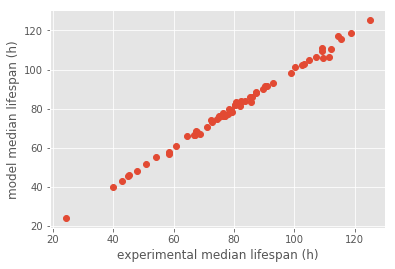

In [26]:
plt.plot([float(r) for r in strain_df['med_model']], strain_df['med_exp'],'o')
plt.xlabel('experimental median lifespan (h)')
plt.ylabel('model median lifespan (h)')


### 4.2 Calculating C.I.s of aging statistics from bootstrapped GGM parameters

In [27]:
for strain in Fitted.keys():
    stats[strain]['smed'] = stats[strain]['median']*stats[strain]['rate']

for strain in Fitted.keys():
    stats[strain]['inverse_eta'] = stats[strain]['beta']/stats[strain]['s']
    strain_df.loc[strain, 'inverse_eta'] = np.median(stats[strain]['beta']/stats[strain]['s'])
    strain_df.loc[strain,'model_type'] = Fitted[strain]['type']
    strain_df.loc[strain,'shape_exp'] = strain_df.loc[strain,'med_exp']*strain_df.loc[strain,'rate']
    strain_df.loc[strain,'shape_med'] = np.median(stats[strain]['median']*stats[strain]['rate'])
    
    strain_df.loc[strain,'med_model_L95%'] = 0.5*(np.sort(stats[strain]['median'])[int(np.floor(len(stats[strain]['median'])*0.025))]+np.sort(stats[strain]['median'])[1+int(np.floor(len(stats[strain]['median'])*0.025))])
    strain_df.loc[strain,'med_model_U95%'] = 0.5*(np.sort(stats[strain]['median'])[int(np.floor(len(stats[strain]['median'])*0.975))]+np.sort(stats[strain]['median'])[1+int(np.floor(len(stats[strain]['median'])*0.975))])
    
    strain_df.loc[strain,'shape_med_L95%'] = 0.5*(np.sort(stats[strain]['smed'])[int(np.floor(len(stats[strain]['smed'])*0.025))]+np.sort(stats[strain]['smed'])[1+int(np.floor(len(stats[strain]['smed'])*0.025))])
    strain_df.loc[strain,'shape_med_U95%'] = 0.5*(np.sort(stats[strain]['smed'])[int(np.floor(len(stats[strain]['smed'])*0.975))]+np.sort(stats[strain]['smed'])[1+int(np.floor(len(stats[strain]['smed'])*0.975))])
    
strain_df['shape_eta'] = [np.log(s*np.log(2)+1) for s in strain_df['inverse_eta']]

strain_df['scale_ratio_log2'] = [np.log2(float(r)) for r in strain_df['scale_ratio']]
strain_df['scale_ratio_log2_L95%'] = np.log2(strain_df.loc['WT','rate'])-np.log2(strain_df.loc[:,'rate_U95%'])
strain_df['scale_ratio_log2_U95%'] = np.log2(strain_df.loc['WT','rate'])-np.log2(strain_df.loc[:,'rate_L95%'])
strain_df['lifespan_ratio_log2'] = np.log2([lf/strain_df.loc['WT','med_exp'] for lf in strain_df.loc[:,'med_exp']])
strain_df['lifespan_ratio_log2_L95%'] = np.log2(strain_df.loc[:,'med_exp_L95%']/strain_df.loc['WT','med_exp'])
strain_df['lifespan_ratio_log2_U95%'] = np.log2(strain_df.loc[:,'med_exp_U95%']/strain_df.loc['WT','med_exp']) 
strain_df['shape_ratio_log2'] = [np.log2(float(r)) for r in strain_df['med_ratio']/strain_df['scale_ratio']]
strain_df['shape_ratio_log2_L95%'] = np.log2(strain_df.loc[:,'shape_med_L95%']/strain_df.loc['WT','shape_med'])
strain_df['shape_ratio_log2_U95%'] = np.log2(strain_df.loc[:,'shape_med_U95%']/strain_df.loc['WT','shape_med'])

### 4.3 Drop data with too few imaging positions to avoid large C.I.s

In [28]:
for strain in dfs_mortality.keys():
    if len(np.unique(dfs_mortality[strain]['fn'])) < 3:
        print strain
        strain_df.drop(strain, inplace=True)

recF


### 4.4 Classify and plot strains based on significant differences in aging parameters

In [29]:
for strain in strain_df.index:
    for trait in ['rate', 'med_exp', 'shape_med']:
        if strain_df.loc[strain, trait+'_U95%'] < strain_df.loc['WT', trait+'_L95%']:
            strain_df.loc[strain, trait+'_overlap_wt'] = -1
        elif strain_df.loc[strain, trait+'_L95%'] > strain_df.loc['WT', trait+'_U95%']:
            strain_df.loc[strain, trait+'_overlap_wt'] = 1
        else:
            strain_df.loc[strain, trait+'_overlap_wt'] = 0

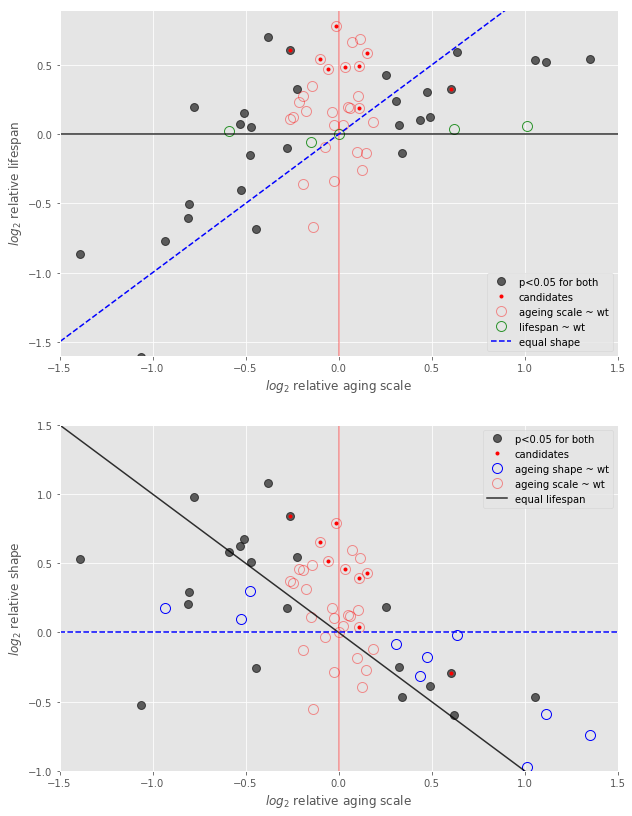

In [30]:
candidates = ['ompL_new','pgi','uxaB_new','aqpZ','ascG','caiT_new','yagS','yfiD_new', 'appY']
rate_diff = set(strain_df.index[strain_df['rate_overlap_wt']!=0])
rate_non = set(strain_df.index[strain_df['rate_overlap_wt']==0])
lifespan_diff = set(strain_df.index[strain_df['med_exp_overlap_wt']!=0])
lifespan_non = set(strain_df.index[strain_df['med_exp_overlap_wt']==0])
shape_diff = set(strain_df.index[strain_df['shape_med_overlap_wt']!=0])
shape_non = set(strain_df.index[strain_df['shape_med_overlap_wt']==0])

f, (ax1, ax2) = plt.subplots(2, sharex=False)

ax1.plot(strain_df.loc[set.intersection(rate_diff, lifespan_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(rate_diff, lifespan_diff),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax1.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
         strain_df.loc[candidates,'lifespan_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax1.plot(strain_df.loc[set.difference(rate_non, lifespan_non), 'scale_ratio_log2'],
         strain_df.loc[set.difference(rate_non, lifespan_non), 'lifespan_ratio_log2'],
         'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[lifespan_non, 'scale_ratio_log2'],
         strain_df.loc[lifespan_non, 'lifespan_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)

ax1.set_ylabel('$log_2$ relative lifespan')
ax1.set_xlabel('$log_2$ relative aging scale')
ax1.plot(np.arange(4,-4,-0.1), [0]*80, '-', color='k', alpha=0.8)
ax1.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', color='b', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df.loc[set.intersection(shape_diff, rate_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(shape_diff, rate_diff),'shape_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax2.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
         strain_df.loc[candidates,'shape_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax2.plot(strain_df.loc[set.difference(shape_non, rate_non), 'scale_ratio_log2'],
         strain_df.loc[set.difference(shape_non, rate_non), 'shape_ratio_log2'],
        'o',label='ageing shape ~ wt',markerfacecolor='none', markeredgecolor='b', markersize=10)
ax2.plot(strain_df.loc[rate_non, 'scale_ratio_log2'],
         strain_df.loc[rate_non, 'shape_ratio_log2'],
        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax2.set_xlabel('$log_2$ relative aging scale')
ax2.set_ylabel('$log_2$ relative shape ')
ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '-',color='k', alpha=0.8, label='equal lifespan')
ax2.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--',color='b')
ax2.legend(loc=1)

ax1.set_xlim([-1.5,1.5])
ax2.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.6,0.9])
ax2.set_ylim([-1,1.5])


f.set_size_inches(10,14)

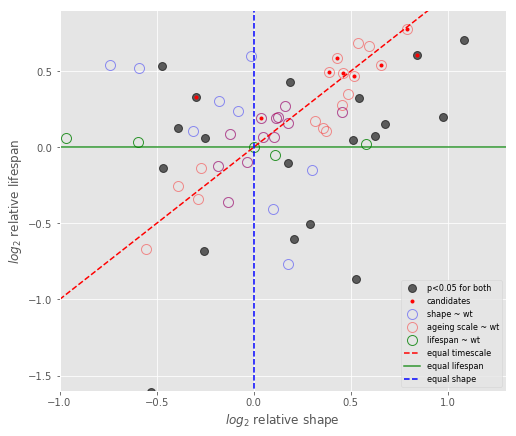

In [31]:
f, (ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[set.difference(set.intersection(shape_diff, lifespan_diff),rate_non),'shape_ratio_log2'], 
         strain_df.loc[set.difference(set.intersection(shape_diff, lifespan_diff),rate_non),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax1.plot(strain_df.loc[candidates,'shape_ratio_log2'], 
         strain_df.loc[candidates,'lifespan_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax1.plot(strain_df.loc[set.difference(shape_non, lifespan_non), 'shape_ratio_log2'],
         strain_df.loc[set.difference(shape_non, lifespan_non), 'lifespan_ratio_log2'],
         'o',label='shape ~ wt',markerfacecolor='none', markeredgecolor='b', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[set.difference(rate_non,lifespan_non), 'shape_ratio_log2'],
         strain_df.loc[set.difference(rate_non,lifespan_non), 'lifespan_ratio_log2'],
        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[lifespan_non, 'shape_ratio_log2'],
         strain_df.loc[lifespan_non, 'lifespan_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)


ax1.set_xlabel('$log_2$ relative shape')
ax1.set_ylabel('$log_2$ relative lifespan')
ax1.plot(np.arange(-1,1.5,0.1), np.arange(-1,1.5,0.1), 'r--', label='equal timescale')
ax1.plot(np.arange(4,-4,-0.1),[0]*80, '-',color='g', alpha=0.8, label='equal lifespan')
ax1.plot([0]*80,np.arange(4,-4,-0.1),  '--',color='b', label='equal shape')
ax1.legend(loc=4, fontsize=8)

ax1.set_ylim([-1.6,0.9])
ax1.set_xlim([-1,1.3])


f.set_size_inches(8,7)

# 5. What is shape? A function of Gompertz intercept

### 5.1 Analytical formulation of shape using Gamma-Gompertz parameters: $ln(\frac{\beta}{s}ln2+1)$

### 5.2 Analytical vs experimental shape

__Experimental shape could be calculated using lifespan distribution without assuming parametric models__

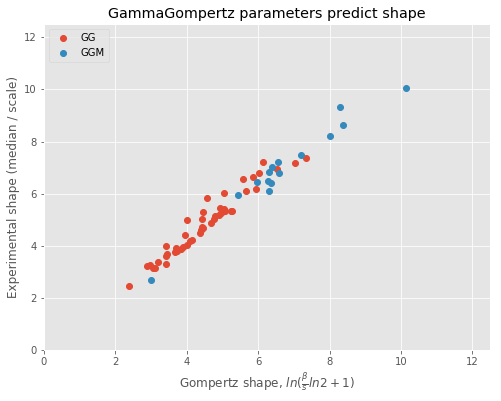

In [32]:
f, ( ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[strain_df['model_type']=='GG','shape_eta'],
         strain_df.loc[strain_df['model_type']=='GG','shape_exp'],'o',label='GG')
ax1.plot(strain_df.loc[strain_df['model_type']=='GGM','shape_eta'],
         strain_df.loc[strain_df['model_type']=='GGM','shape_exp'],'o',label='GGM')
ax1.set_xlabel('Gompertz median')
ax1.set_ylabel('Experimental shape (median / scale)')
ax1.set_xlim([0,12.5])
ax1.set_ylim([0,12.5])
ax1.legend(loc=2)

ax1.set_xlabel(r'Gompertz shape, $ln(\frac{\beta}{s}ln2+1)$')
ax1.set_title('GammaGompertz parameters predict shape')

f.set_size_inches(8,6)

### 5.3 Analytical vs GGM model shape

**Shape can also be calculated using fitted GGM models. Ignoring Makeham term do not make much difference**

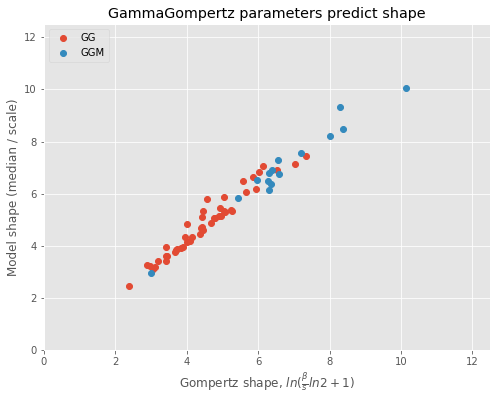

In [33]:
f, ( ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[strain_df['model_type']=='GG','shape_eta'],
         strain_df.loc[strain_df['model_type']=='GG','shape_med'],'o',label='GG')
ax1.plot(strain_df.loc[strain_df['model_type']=='GGM','shape_eta'],
         strain_df.loc[strain_df['model_type']=='GGM','shape_med'],'o',label='GGM')
ax1.set_xlabel('Gompertz median')
ax1.set_ylabel('Model shape (median / scale)')
ax1.set_xlim([0,12.5])
ax1.set_ylim([0,12.5])
ax1.legend(loc=2)

ax1.set_xlabel(r'Gompertz shape, $ln(\frac{\beta}{s}ln2+1)$')

ax1.set_title('GammaGompertz parameters predict shape')

f.set_size_inches(8,6)

### 5.4 Shape and Gompertz intercept $\eta = \frac{\beta}{s}$

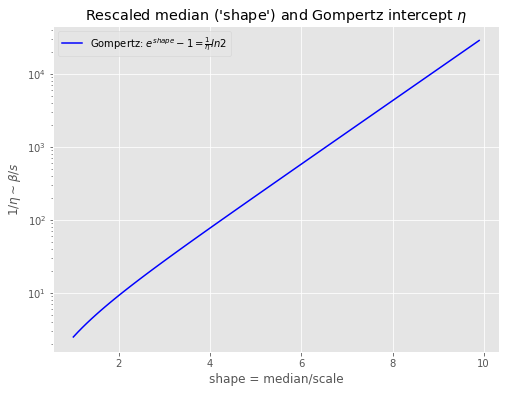

In [34]:
ax2 = plt.gca()
ax2.plot(np.arange(1,10,0.1), [(np.exp(s)-1)/np.log(2) for s in np.arange(1,10,0.1)], 'b',
         label=r'Gompertz: $e^{shape}-1 = \frac{1}{\eta}ln2$')
ax2.set_yscale('log')
ax2.set_ylabel('$1/\\eta \\sim \\beta/s$')
ax2.set_xlabel('shape = median/scale')
ax2.legend(loc=0)
ax2.set_title('Rescaled median (\'shape\') and Gompertz intercept $\eta$')

plt.gcf().set_size_inches(8,6)

## 6. Saving and replotting aging parameters using only initially selected mutants

### 6.0 Saving results so far

In [35]:
strain_df[['scale','scale_ratio','scale_ratio_log2','rate_overlap_wt',
           'med_exp','med_exp_overlap_wt','med_model','med_ratio','lifespan_ratio_log2',
           'shape_med','shape_med_overlap_wt','shape_exp','shape_eta','inverse_eta','shape_ratio_log2']].to_csv('/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/Aging parameters.csv')
strain_df[['scale_ratio_log2','scale','lifespan_ratio_log2','med_exp',
           'shape_ratio_log2','shape_exp',
           'rate_overlap_wt','med_exp_overlap_wt','shape_med_overlap_wt']].to_csv(
                '/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/Mutant effects on aging parameters.csv')

In [70]:
strain_df.loc[['WT']+candidates, ['model type']+
              list(np.ravel([[trait,trait+'_L95%',trait+'_U95%'] for trait in ['rate','beta','s','lambda']]))].to_csv(
                '/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/Candidates aging parameters.csv')
strain_df.loc[['WT']+candidates, ['model type']+
              list(np.ravel([[trait,trait+'_L95%',trait+'_U95%'] for trait in ['rate','beta','s','lambda']]))]

,model type,rate,rate_L95%,rate_U95%,beta,beta_L95%,beta_U95%,s,s_L95%,s_U95%,lambda,lambda_L95%,lambda_U95%
WT,GG,0.064920,0.060430,0.069744,137.998210,117.864945,161.570567,1.161787,0.923769,1.461131,0.000000,0.000000,0.000000
ompL_new,GG,0.060087,0.055921,0.064564,784.064276,623.390153,986.150945,1.422673,1.087176,1.861701,0.000000,0.000000,0.000000
pgi,GG,0.060172,0.048693,0.074357,36.361549,27.198039,48.612410,0.463022,0.290897,0.736994,0.000000,0.000000,0.000000
uxaB_new,GGM,0.067476,0.057139,0.079684,518.388538,269.759343,996.171897,0.664136,0.466388,0.945730,0.000353,0.000163,0.000762
aqpZ,GGM,0.065524,0.058568,0.073307,6696.465138,4320.114931,10379.965825,1.543944,0.731697,3.257857,0.000241,0.000164,0.000356
ascG,GG,0.069445,0.063242,0.076258,6542.499451,3447.929981,12414.491972,2.985047,1.170174,7.614688,0.000000,0.000000,0.000000
caiT_new,GGM,0.063348,0.057931,0.069272,1150.650263,863.421348,1533.429803,1.488977,1.080413,2.052040,0.000123,0.000047,0.000320
yagS,GG,0.042720,0.038592,0.047289,139.987615,100.169322,195.634073,2.435248,1.479205,4.009205,0.000000,0.000000,0.000000
yfiD_new,GGM,0.058415,0.050706,0.067296,2269.020840,1388.202664,3708.720427,2.694394,1.201111,6.044206,0.000632,0.000399,0.001000
appY,GGM,0.077733,0.070740,0.085418,15770.829642,10253.556617,24256.858070,2.552288,1.393402,4.675014,0.000095,0.000035,0.000263


In [74]:
for strain in Fitted.keys():
    quantiles[strain].to_csv('/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/bootstrap sample parameters/'+strain+'.csv')

### 6.1 Growth yields are only measured for the initially selected mutants

In [37]:
yield_df = pandas.read_csv('/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/growth/OD 600 at 24h of KO - Sheet1.csv',sep=',')
yield_df.set_index('Unnamed: 0', inplace=True)

In [38]:
initial_genes = list(yield_df.index)
initial_strains = [strain for strain in strain_df.index
                   if strain.split('_')[0] in initial_genes]
other_strains = [strain for strain in strain_df.index
                   if strain.split('_')[0] not in initial_genes]
for strain in initial_strains:
    strain_df.loc[strain, 'yield_mean'] = np.mean(yield_df.loc[strain.split('_')[0], :])
    strain_df.loc[strain, 'yield_std'] = np.std(yield_df.loc[strain.split('_')[0], :])

### 6.2 Three sub-types are outlined: mutants with wildtype level lifespan or aging scale or shape

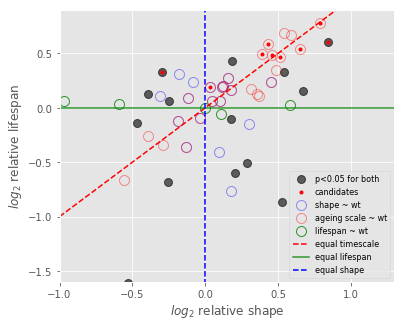

In [39]:
f, (ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[set.difference(set.intersection(set(initial_strains), shape_diff, lifespan_diff),rate_non),'shape_ratio_log2'], 
         strain_df.loc[set.difference(set.intersection(set(initial_strains), shape_diff, lifespan_diff),rate_non),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax1.plot(strain_df.loc[candidates,'shape_ratio_log2'], 
         strain_df.loc[candidates,'lifespan_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, lifespan_non)), 'shape_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, lifespan_non)), 'lifespan_ratio_log2'],
         'o',label='shape ~ wt',markerfacecolor='none', markeredgecolor='b', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non,lifespan_non)), 'shape_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non,lifespan_non)), 'lifespan_ratio_log2'],
        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), lifespan_non), 'shape_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), lifespan_non), 'lifespan_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)


ax1.set_xlabel('$log_2$ relative shape')
ax1.set_ylabel('$log_2$ relative lifespan')
ax1.plot(np.arange(-1,1.5,0.1), np.arange(-1,1.5,0.1), 'r--', label='equal timescale')
ax1.plot(np.arange(4,-4,-0.1),[0]*80, '-',color='g', alpha=0.8, label='equal lifespan')
ax1.plot([0]*80,np.arange(4,-4,-0.1),  '--',color='b', label='equal shape')
ax1.legend(loc=4, fontsize=8)

ax1.set_ylim([-1.6,0.9])
ax1.set_xlim([-1,1.3])


f.set_size_inches(6,5)

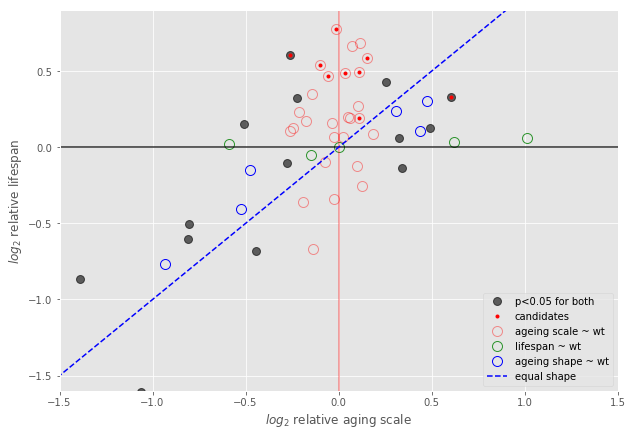

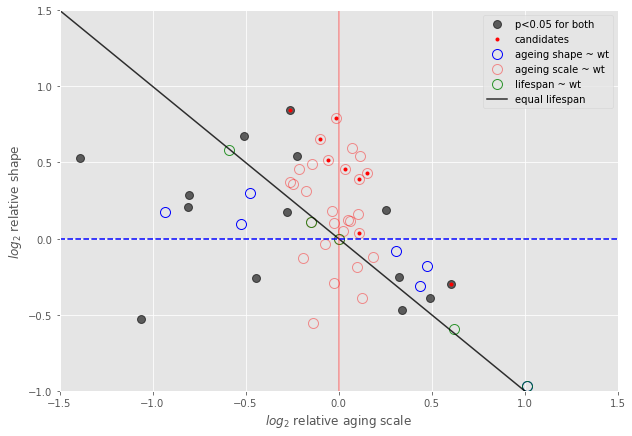

In [40]:
candidates = ['ompL_new','pgi','uxaB_new','aqpZ','ascG','caiT_new','yagS','yfiD_new', 'appY']
rate_diff = set(strain_df.index[strain_df['rate_overlap_wt']!=0])
rate_non = set(strain_df.index[strain_df['rate_overlap_wt']==0])
lifespan_diff = set(strain_df.index[strain_df['med_exp_overlap_wt']!=0])
lifespan_non = set(strain_df.index[strain_df['med_exp_overlap_wt']==0])
shape_diff = set(strain_df.index[strain_df['shape_med_overlap_wt']!=0])
shape_non = set(strain_df.index[strain_df['shape_med_overlap_wt']==0])

f1, (ax1) = plt.subplots(1, sharex=False)
f2, (ax2) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff, shape_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff, shape_diff),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax1.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
         strain_df.loc[candidates,'lifespan_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non, lifespan_non)), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non, lifespan_non)), 'lifespan_ratio_log2'],
         'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'lifespan_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, rate_non), lifespan_diff), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, rate_non), lifespan_diff), 'lifespan_ratio_log2'],
        'o',label='ageing shape ~ wt',markerfacecolor='none', markeredgecolor='b', markersize=10)

ax1.set_ylabel('$log_2$ relative lifespan')
ax1.set_xlabel('$log_2$ relative aging scale')
ax1.plot(np.arange(4,-4,-0.1), [0]*80, '-', color='k', alpha=0.8)
ax1.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', color='b', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df.loc[set.intersection(set(initial_strains), shape_diff, rate_diff, lifespan_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(set(initial_strains), shape_diff, rate_diff, lifespan_diff),'shape_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax2.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
         strain_df.loc[candidates,'shape_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax2.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, rate_non)), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(shape_non, rate_non)), 'shape_ratio_log2'],
        'o',label='ageing shape ~ wt',markerfacecolor='none', markeredgecolor='b', markersize=10)
ax2.plot(strain_df.loc[set.intersection(set(initial_strains), rate_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), rate_non), 'shape_ratio_log2'],
        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax2.plot(strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'shape_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)
ax2.set_xlabel('$log_2$ relative aging scale')
ax2.set_ylabel('$log_2$ relative shape ')
ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '-',color='k', alpha=0.8, label='equal lifespan')
ax2.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--',color='b')
ax2.legend(loc=1)

ax1.set_xlim([-1.5,1.5])
ax2.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.6,0.9])
ax2.set_ylim([-1,1.5])


f2.set_size_inches(10,7)
f1.set_size_inches(10,7)

### 6.3 Only two sub-types are outlined: mutants with wildtype level lifespan or aging scale

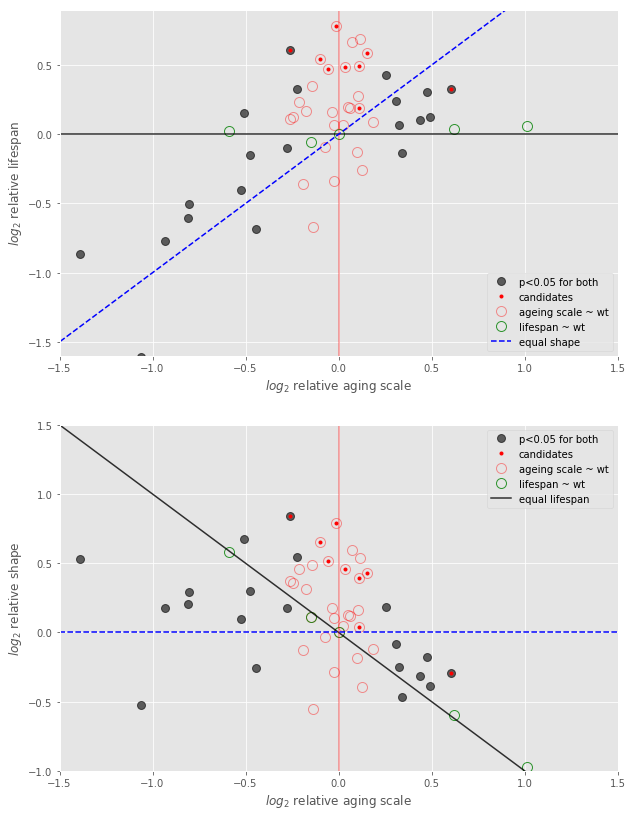

In [41]:
candidates = ['ompL_new','pgi','uxaB_new','aqpZ','ascG','caiT_new','yagS','yfiD_new', 'appY']
rate_diff = set(strain_df.index[strain_df['rate_overlap_wt']!=0])
rate_non = set(strain_df.index[strain_df['rate_overlap_wt']==0])
lifespan_diff = set(strain_df.index[strain_df['med_exp_overlap_wt']!=0])
lifespan_non = set(strain_df.index[strain_df['med_exp_overlap_wt']==0])
shape_diff = set(strain_df.index[strain_df['shape_med_overlap_wt']!=0])
shape_non = set(strain_df.index[strain_df['shape_med_overlap_wt']==0])

f, (ax1, ax2) = plt.subplots(2, sharex=False)

ax1.plot(strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax1.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
         strain_df.loc[candidates,'lifespan_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non, lifespan_non)), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non, lifespan_non)), 'lifespan_ratio_log2'],
         'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'lifespan_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)

ax1.set_ylabel('$log_2$ relative lifespan')
ax1.set_xlabel('$log_2$ relative aging scale')
ax1.plot(np.arange(4,-4,-0.1), [0]*80, '-', color='k', alpha=0.8)
ax1.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', color='b', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff),'scale_ratio_log2'], 
         strain_df.loc[set.intersection(set(initial_strains), rate_diff, lifespan_diff),'shape_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax2.plot(strain_df.loc[candidates,'scale_ratio_log2'], 
         strain_df.loc[candidates,'shape_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax2.plot(strain_df.loc[set.intersection(set(initial_strains), rate_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), rate_non), 'shape_ratio_log2'],
        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax2.plot(strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'scale_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains),lifespan_non), 'shape_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)
ax2.set_xlabel('$log_2$ relative aging scale')
ax2.set_ylabel('$log_2$ relative shape ')
ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '-',color='k', alpha=0.8, label='equal lifespan')
ax2.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--',color='b')
ax2.legend(loc=1)

ax1.set_xlim([-1.5,1.5])
ax2.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.6,0.9])
ax2.set_ylim([-1,1.5])


f.set_size_inches(10,14)

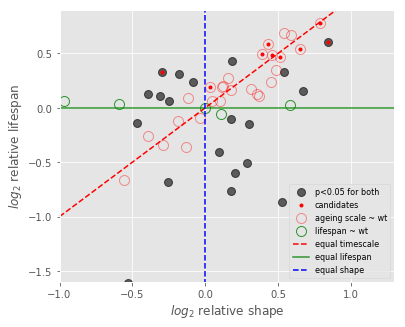

In [42]:
f, (ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[set.difference(set.intersection(set(initial_strains), lifespan_diff),rate_non),'shape_ratio_log2'], 
         strain_df.loc[set.difference(set.intersection(set(initial_strains), lifespan_diff),rate_non),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
ax1.plot(strain_df.loc[candidates,'shape_ratio_log2'], 
         strain_df.loc[candidates,'lifespan_ratio_log2'],
         '.',label='candidates', color='r', markersize=6)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non,lifespan_non)), 'shape_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), set.difference(rate_non,lifespan_non)), 'lifespan_ratio_log2'],
        'o',label='ageing scale ~ wt',markerfacecolor='none', markeredgecolor='r', alpha=0.4, markersize=10)
ax1.plot(strain_df.loc[set.intersection(set(initial_strains), lifespan_non), 'shape_ratio_log2'],
         strain_df.loc[set.intersection(set(initial_strains), lifespan_non), 'lifespan_ratio_log2'],
         'o',label='lifespan ~ wt', markerfacecolor='none', markeredgecolor='g', alpha=0.8, markersize=10)


ax1.set_xlabel('$log_2$ relative shape')
ax1.set_ylabel('$log_2$ relative lifespan')
ax1.plot(np.arange(-1,1.5,0.1), np.arange(-1,1.5,0.1), 'r--', label='equal timescale')
ax1.plot(np.arange(4,-4,-0.1),[0]*80, '-',color='g', alpha=0.8, label='equal lifespan')
ax1.plot([0]*80,np.arange(4,-4,-0.1),  '--',color='b', label='equal shape')
ax1.legend(loc=4, fontsize=8)

ax1.set_ylim([-1.6,0.9])
ax1.set_xlim([-1,1.3])


f.set_size_inches(6,5)

# 7. Publication quality exhibitions of mutant lifespan distributions 

In [43]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("poster")
sns.set_style("white")

In [44]:
coordinates = dict()
for strain in initial_strains:
    coordinates[strain] = (strain_df.loc[strain,'scale_ratio_log2'], strain_df.loc[strain,'lifespan_ratio_log2'])
def distance(strain1, strain2):
    return np.sqrt(np.sum(np.power(coordinates[strain1][i]-coordinates[strain2][i], 2) for i in range(2)))

grid_positions = dict()
vectors = dict()
to_assign = set(initial_strains)
grid_positions['WT']=(0,0)
to_assign.remove('WT')
while len(to_assign) > 0:
    #finding the next strain to assign: closed to already assigned strains
    min_dist2grid = 99.0
    next_strain2assign = ''
    for strain in to_assign:
        dist2grid = np.min([distance(strain,assigned) for assigned in grid_positions.keys()])
        if dist2grid < min_dist2grid:
            next_strain2assign = strain
            min_dist2grid = dist2grid
    for assigned in grid_positions.keys():
        if distance(next_strain2assign,assigned) == min_dist2grid:
            #assign next_strain2assign next to its closest assignd neighbor
            dist_x = np.abs(coordinates[next_strain2assign][0]-coordinates[assigned][0])
            dist_y = np.abs(coordinates[next_strain2assign][1]-coordinates[assigned][1])
            if dist_x > dist_y:
                grid_positions[next_strain2assign] = (grid_positions[assigned][0], 
                                                      grid_positions[assigned][1]+
                                                     int((coordinates[next_strain2assign][1]-
                                                          coordinates[assigned][1])/
                                                         dist_y)
                                                     )
            else:
                grid_positions[next_strain2assign] = (grid_positions[assigned][0]+
                                                        int((coordinates[next_strain2assign][0]-
                                                          coordinates[assigned][0])/dist_x), 
                                                      grid_positions[assigned][1])
            vectors[next_strain2assign] = (assigned, (coordinates[next_strain2assign][0]-coordinates[assigned][0],
                                    coordinates[next_strain2assign][1]-coordinates[assigned][1]))
            print assigned, grid_positions[assigned], '->', next_strain2assign, grid_positions[next_strain2assign],coordinates[next_strain2assign]
            to_assign.remove(next_strain2assign)

WT (0, 0) -> eptB (-1, 0) (-0.02572674964995789, 0.064779071528159454)
eptB (-1, 0) -> brnQ_new (-1, 1) (0.023210712129011501, 0.066315640559888187)
eptB (-1, 0) -> aceF (-2, 0) (-0.036528410248734725, 0.16128502203447179)
aceF (-2, 0) -> yehY (-2, 1) (0.052081020388871739, 0.20013616348522942)
yehY (-2, 1) -> pfkA (-1, 1) (0.060394269699265431, 0.19055069932128205)
pfkA (-1, 1) -> pgi (-1, 2) (0.10957846827511435, 0.19118672741463377)
pgi (-1, 2) -> crcA (-2, 2) (0.1021049509536073, 0.27398611703171682)
WT (0, 0) -> bipA (-1, 0) (-0.075297753800935383, -0.094362206652386343)
bipA (-1, 0) -> rsxC (-1, 1) (-0.14648959060844527, -0.053260253560560071)
pgi (-1, 2) -> hchA (0, 2) (0.1869310577600545, 0.089967693768536902)
rsxC (-1, 1) -> fkpA (-1, 0) (-0.27669057041442036, -0.1007023911389895)
aceF (-2, 0) -> abgR (-2, 1) (-0.17484792878559063, 0.16976611036158543)
abgR (-2, 1) -> yecP (-3, 1) (-0.21511499200155476, 0.23466017654791288)
abgR (-2, 1) -> agaR (-2, 0) (-0.24321946748293335, 0

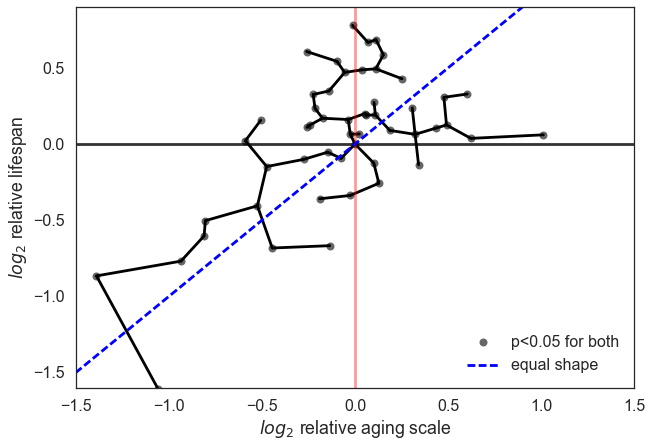

In [45]:
f, (ax1) = plt.subplots(1, sharex=False)

ax1.plot(strain_df.loc[set(initial_strains),'scale_ratio_log2'], 
         strain_df.loc[set(initial_strains),'lifespan_ratio_log2'],
         'o',label='p<0.05 for both', color='k', markersize=8, alpha=0.6)
for strain, (start, vector) in vectors.items():
    ax1.plot([coordinates[start][0], coordinates[strain][0]], [coordinates[start][1], coordinates[strain][1]], 'k-')

ax1.set_ylabel('$log_2$ relative lifespan')
ax1.set_xlabel('$log_2$ relative aging scale')
ax1.plot(np.arange(4,-4,-0.1), [0]*80, '-', color='k', alpha=0.8)
ax1.plot( [0]*80, np.arange(4,-4,-0.1), '-', color='r', alpha=0.4)
ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', color='b', label='equal shape')
ax1.legend(loc=4)

ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.6,0.9])

f.set_size_inches(10,7)

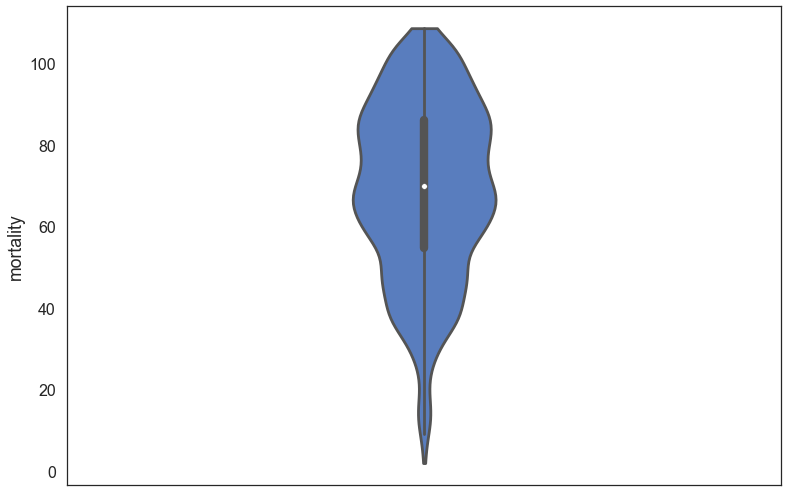

In [46]:
sns.violinplot(dfs_mortality['WT']['mortality'],
               scale='area',cut=0,bw=0.2,gridsize=100,palette="muted",orient='v',
               width=0.2, inner='box')

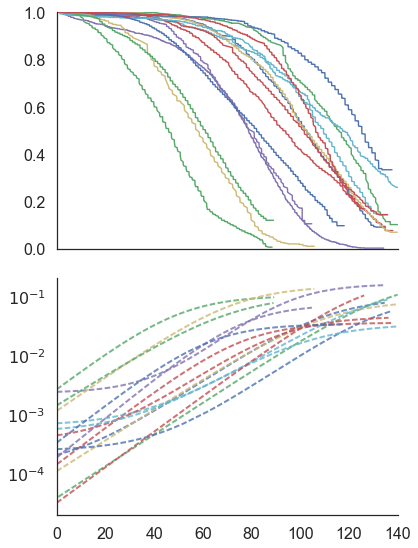

In [47]:
from cohortMortalitySummary import KaplanMeier, NelsonAalen, Breslow, BSHazardR, generate_ts_image
f, (ax1, ax3) = plt.subplots(2, 1, sharex=True, sharey=False)
for strain in list(set.intersection(set(initial_strains), shape_diff, rate_non)):
    KM = KaplanMeier(dfs_mortality[strain], tgs_mortality[strain])
    ax1.plot(KM.index,KM.loc[:,'survivorship'],linewidth=1.4)
    #ax1.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_survivorship'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
    #ax1.fill_between(KM.index,KM.loc[:,'lower_ci'],KM.loc[:,'upper_ci'],
    #                        alpha=0.3)
    #BSFit = BSFits[strain]
    #ax3.plot(BSFit['time'],BSFit['hazard'],linewidth=1.4)
    #ax3.fill_between(BSFit['time'],BSFit['lower.ci'],BSFit['upper.ci'],
    #                        alpha=0.5)
    ax3.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_hazard'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
ax1.set_ylim([0,1])
ax1.set_xlim([0,140])
ax3.set_yscale('log')
ax3.set_ylim([0.00002,0.2])
sns.despine()
f.set_size_inches(6,8)
plt.tight_layout()

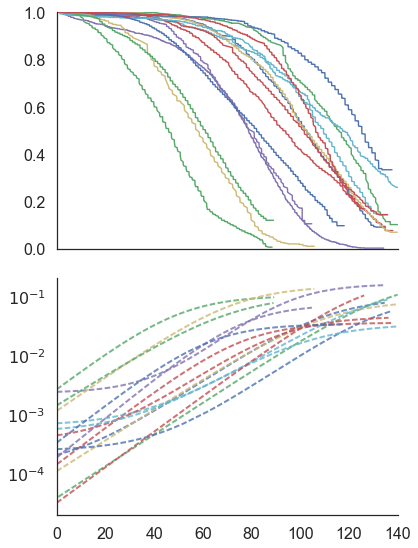

In [48]:
from cohortMortalitySummary import KaplanMeier, NelsonAalen, Breslow, BSHazardR, generate_ts_image
f, (ax1, ax3) = plt.subplots(2, 1, sharex=True, sharey=False)
for strain in list(set.intersection(set(initial_strains), shape_diff, rate_non)):
    KM = KaplanMeier(dfs_mortality[strain], tgs_mortality[strain])
    ax1.plot(KM.index,KM.loc[:,'survivorship'],linewidth=1.4)
    #ax1.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_survivorship'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
    #ax1.fill_between(KM.index,KM.loc[:,'lower_ci'],KM.loc[:,'upper_ci'],
    #                        alpha=0.3)
    #BSFit = BSHazardR(dfs_mortality[strain])
    #ax3.plot(BSFit['time'],BSFit['hazard'],linewidth=1.4)
    #ax3.fill_between(BSFit['time'],BSFit['lower.ci'],BSFit['upper.ci'],
    #                        alpha=0.5)
    ax3.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_hazard'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
ax1.set_ylim([0,1])
ax1.set_xlim([0,140])
ax3.set_yscale('log')
ax3.set_ylim([0.00002,0.2])
sns.despine()
f.set_size_inches(6,8)
plt.tight_layout()

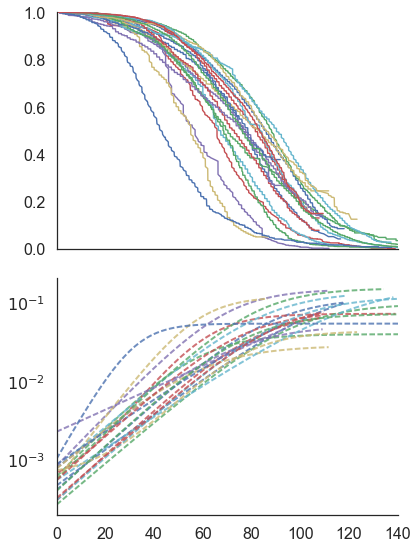

In [49]:
from cohortMortalitySummary import KaplanMeier, NelsonAalen, Breslow, BSHazardR, generate_ts_image
f, (ax1, ax3) = plt.subplots(2, 1, sharex=True, sharey=False)
for strain in list(set.intersection(set(initial_strains), shape_non)):
    KM = KaplanMeier(dfs_mortality[strain], tgs_mortality[strain])
    ax1.plot(KM.index,KM.loc[:,'survivorship'],linewidth=1.4)
    #ax1.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_survivorship'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
    #ax1.fill_between(KM.index,KM.loc[:,'lower_ci'],KM.loc[:,'upper_ci'],
    #                        alpha=0.3)
    #BSFit = BSFits[strain]
    #ax3.plot(BSFit['time'],BSFit['hazard'],linewidth=1.4)
    #ax3.fill_between(BSFit['time'],BSFit['lower.ci'],BSFit['upper.ci'],
    #                        alpha=0.5)
    ax3.plot(tgs_mortality[strain][1:],Fitted[strain]['ML_hazard'](tgs_mortality[strain][1:]),linewidth=2, linestyle='--',alpha=0.8)
ax1.set_ylim([0,1])
ax1.set_xlim([0,140])
ax3.set_yscale('log')
ax3.set_ylim([0.0002,0.2])
sns.despine()
f.set_size_inches(6,8)
plt.tight_layout()

# 8. Correlations between aging and growth parameters

### 8.1 Growth yields vs aging parameters

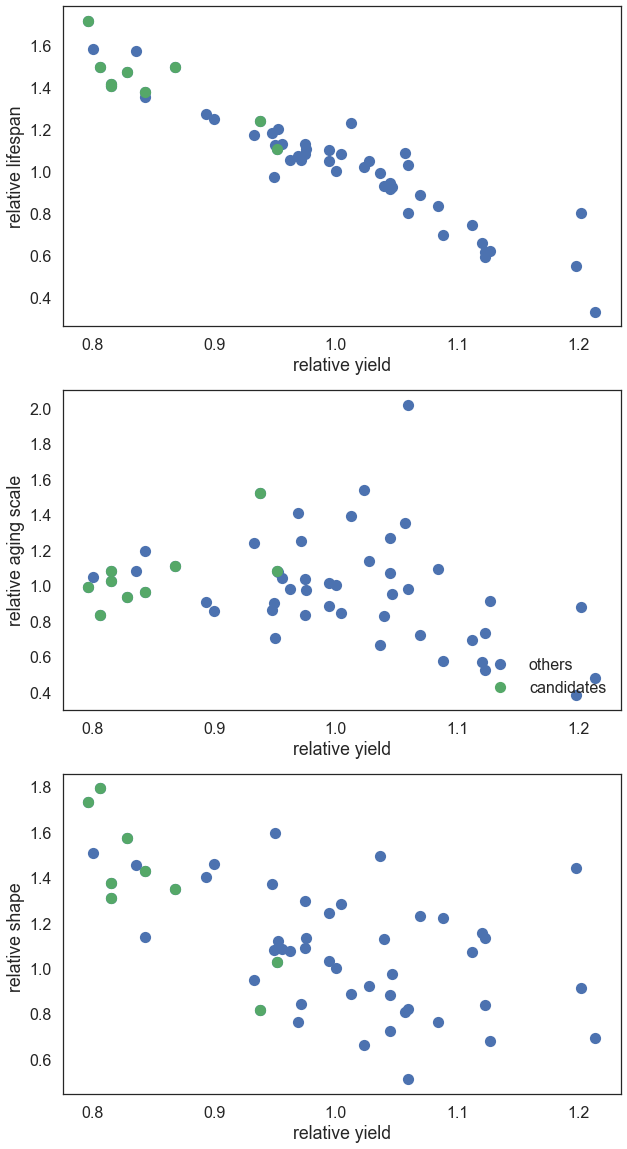

In [50]:
strain_df['yield_ratio_log2'] = [np.log2(float(r)/strain_df.loc['WT','yield_mean']) for r in strain_df['yield_mean']]
strain_df['yield_ratio'] = [float(r)/strain_df.loc['WT','yield_mean'] for r in strain_df['yield_mean']]

f, (ax3, ax1, ax2) = plt.subplots(3, sharex=False)

ax1.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         strain_df.loc[initial_strains, 'scale_ratio'],
         'o',label='others')
ax1.plot(strain_df.loc[candidates, 'yield_ratio'],
         strain_df.loc[candidates, 'scale_ratio'], 'o', label='candidates')
ax1.set_ylabel('relative aging scale')
ax1.set_xlabel('relative yield')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         np.power(2,strain_df.loc[initial_strains, 'shape_ratio_log2']),
         'o',label='others')
ax2.plot(strain_df.loc[candidates, 'yield_ratio'],
         np.power(2,strain_df.loc[candidates, 'shape_ratio_log2']), 'o', label='candidates')
ax2.set_xlabel('relative yield')
ax2.set_ylabel('relative shape ')
#ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '--', label='equal lifespan')
#ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax2.legend(loc=1)

#ax1.set_xlim([-1.5,1.5])
#ax2.set_xlim([-1.5,1.5])
#ax1.set_ylim([-1.6,0.9])
#ax2.set_ylim([-1,1.5])

ax3.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         strain_df.loc[initial_strains, 'med_ratio'],
         'o',label='others')
ax3.plot(strain_df.loc[candidates, 'yield_ratio'],
         strain_df.loc[candidates, 'med_ratio'], 'o', label='candidates')
ax3.set_ylabel('relative lifespan')
ax3.set_xlabel('relative yield')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax3.legend(loc=4)

f.set_size_inches(10,20)

In [51]:
growth_curve_raw_df = pandas.read_csv('/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/growth/Growth Curves Raw Data MS1.csv',sep=';')
max_od = growth_curve_raw_df.iloc[0,1:]
for gene in max_od.index:
    value = float(max_od.loc[gene].replace(',','.'))
    if '.' not in gene:
        yield_df.loc[gene, 'R1'] = value - 0.044
    else:
        yield_df.loc[gene.split('.')[0], 'R'+str(int(gene.split('.')[1])+1)] = value - 0.044

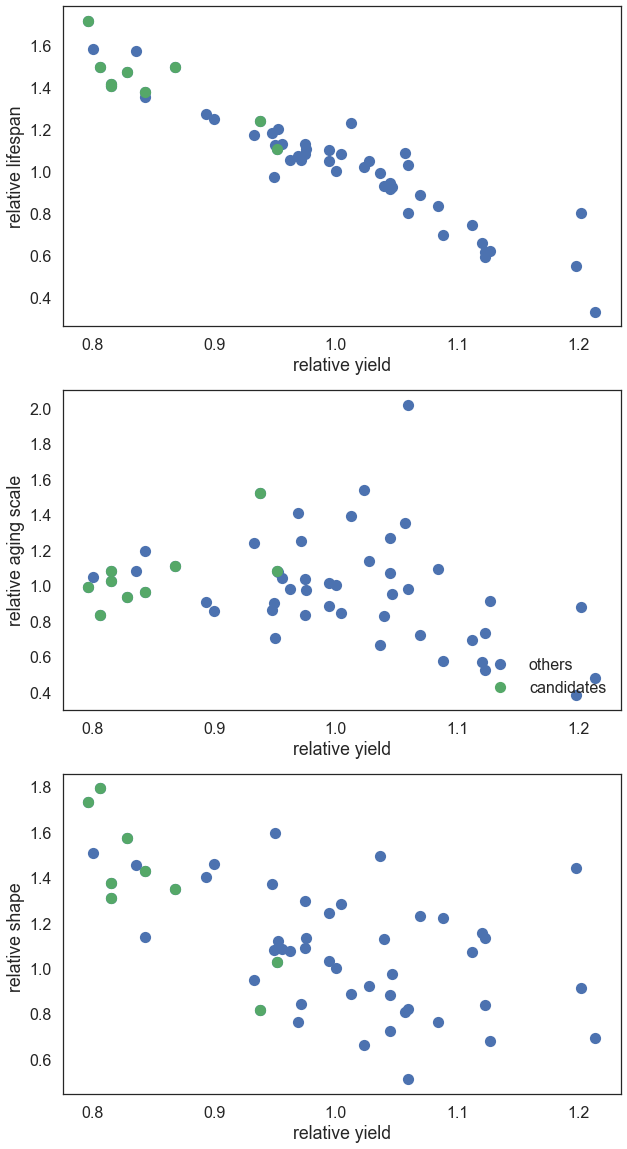

In [52]:
strain_df['yield_ratio_log2'] = [np.log2(float(r)/strain_df.loc['WT','yield_mean']) for r in strain_df['yield_mean']]
strain_df['yield_ratio'] = [float(r)/strain_df.loc['WT','yield_mean'] for r in strain_df['yield_mean']]

f, (ax3, ax1, ax2) = plt.subplots(3, sharex=False)

ax1.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         strain_df.loc[initial_strains, 'scale_ratio'],
         'o',label='others')
ax1.plot(strain_df.loc[candidates, 'yield_ratio'],
         strain_df.loc[candidates, 'scale_ratio'], 'o', label='candidates')
ax1.set_ylabel('relative aging scale')
ax1.set_xlabel('relative yield')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
ax1.legend(loc=4)


ax2.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         np.power(2,strain_df.loc[initial_strains, 'shape_ratio_log2']),
         'o',label='others')
ax2.plot(strain_df.loc[candidates, 'yield_ratio'],
         np.power(2,strain_df.loc[candidates, 'shape_ratio_log2']), 'o', label='candidates')
ax2.set_xlabel('relative yield')
ax2.set_ylabel('relative shape ')
#ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '--', label='equal lifespan')
#ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax2.legend(loc=1)

#ax1.set_xlim([-1.5,1.5])
#ax2.set_xlim([-1.5,1.5])
#ax1.set_ylim([-1.6,0.9])
#ax2.set_ylim([-1,1.5])

ax3.plot(strain_df.loc[initial_strains, 'yield_ratio'], 
         strain_df.loc[initial_strains, 'med_ratio'],
         'o',label='others')
ax3.plot(strain_df.loc[candidates, 'yield_ratio'],
         strain_df.loc[candidates, 'med_ratio'], 'o', label='candidates')
ax3.set_ylabel('relative lifespan')
ax3.set_xlabel('relative yield')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax3.legend(loc=4)

f.set_size_inches(10,20)

### 8.2 Growth rates vs aging parameters

In [53]:
grate_df = pandas.read_csv('/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/growth/Growth Rate of KO - Sheet1.csv',sep=',')
grate_df.set_index('Unnamed: 0', inplace=True)

initial_genes = list(grate_df.index)
initial_strains = [strain for strain in strain_df.index
                   if strain.split('_')[0] in initial_genes]
other_strains = [strain for strain in strain_df.index
                   if strain.split('_')[0] not in initial_genes]
for strain in initial_strains:
    strain_df.loc[strain, 'growr_mean'] = np.mean(grate_df.loc[strain.split('_')[0], :])
    strain_df.loc[strain, 'growr_std'] = np.std(grate_df.loc[strain.split('_')[0], :])

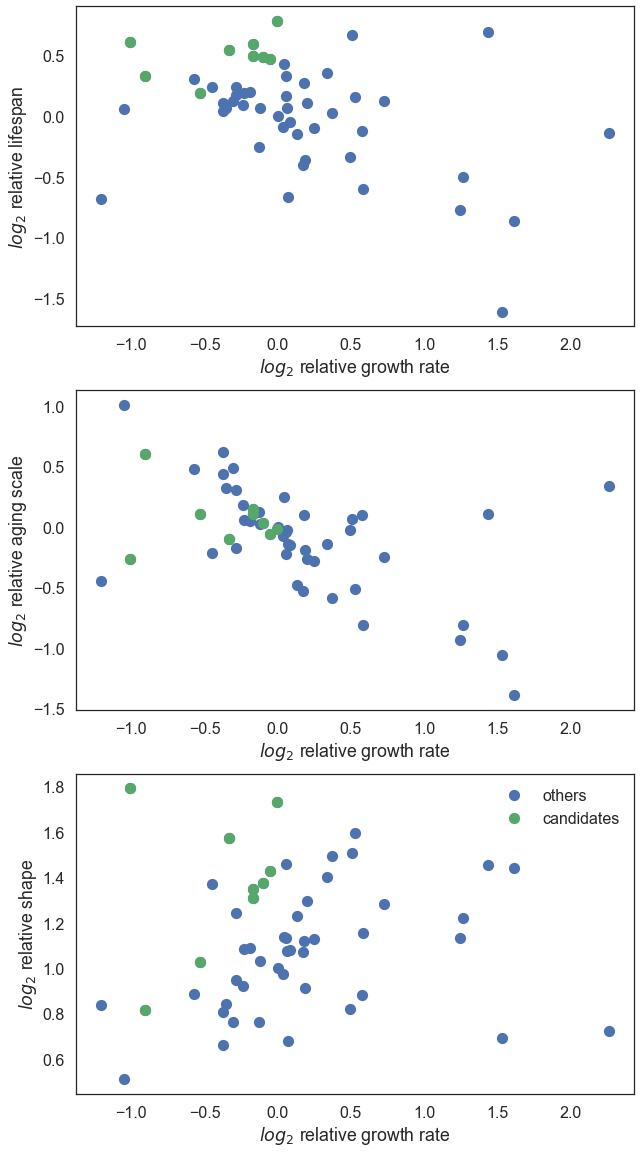

In [54]:
strain_df['growr_ratio_log2'] = [np.log2(float(r)/strain_df.loc['WT','growr_mean']) for r in strain_df['growr_mean']]
strain_df['growr_ratio'] = [float(r)/strain_df.loc['WT','growr_mean'] for r in strain_df['growr_mean']]

f, (ax3, ax1, ax2) = plt.subplots(3, sharex=False)

ax1.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         strain_df.loc[initial_strains, 'scale_ratio_log2'],
         'o',label='others')
ax1.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         strain_df.loc[candidates, 'scale_ratio_log2'], 'o', label='candidates')
ax1.set_ylabel('$log_2$ relative aging scale')
ax1.set_xlabel('$log_2$ relative growth rate')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax2.legend(loc=4)


ax2.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         np.power(2,strain_df.loc[initial_strains, 'shape_ratio_log2']),
         'o',label='others')
ax2.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         np.power(2,strain_df.loc[candidates, 'shape_ratio_log2']), 'o', label='candidates')
ax2.set_xlabel('$log_2$ relative growth rate')
ax2.set_ylabel('$log_2$ relative shape ')
#ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '--', label='equal lifespan')
#ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--')
ax2.legend(loc=1)

#ax1.set_xlim([-1.5,1.5])
#ax2.set_xlim([-1.5,1.5])
#ax1.set_ylim([-1.6,0.9])
#ax2.set_ylim([-1,1.5])

ax3.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         strain_df.loc[initial_strains, 'lifespan_ratio_log2'],
         'o',label='others')
ax3.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         strain_df.loc[candidates, 'lifespan_ratio_log2'], 'o', label='candidates')
ax3.set_ylabel('$log_2$ relative lifespan')
ax3.set_xlabel('$log_2$ relative growth rate')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax3.legend(loc=4)

f.set_size_inches(10,20)

In [55]:
grate_df_new = pandas.read_csv('/Users/yyfwuhan/Projects/2018-TaMaRa-Ana-figures/growth/growth_rate_max_xiaohu.csv',sep=',')
grate_dict = dict()
for i in range(len(grate_df_new)):
    name = grate_df_new.iloc[i,0]
    if grate_dict.has_key(name.split('-')[0]):
        grate_dict[name.split('-')[0]].append(grate_df_new.iloc[i,1])
    else:
        grate_dict[name.split('-')[0]] = [grate_df_new.iloc[i,1]]
initial_genes = list()
initial_strains = list()
for gene, grates in grate_dict.items():
    init_mean = np.mean(grates)
    init_std = np.std(grates)
    for gr in grates:
        if np.abs(gr - init_mean) > 2*init_std:
            print gene, gr, init_mean, init_std
            grates.remove(gr)
    if len(grates) != 0:
        initial_genes.append(gene)
        initial_strains.extend([strain for strain in strain_df.index if strain.split('_')[0] == gene])
        strain = initial_strains[-1]
        strain_df.loc[strain, 'growr_mean'] = np.mean(grates)
        strain_df.loc[strain, 'growr_std'] = np.std(grates)
        
other_strains = [strain for strain in strain_df.index
                   if strain.split('_')[0] not in initial_genes]

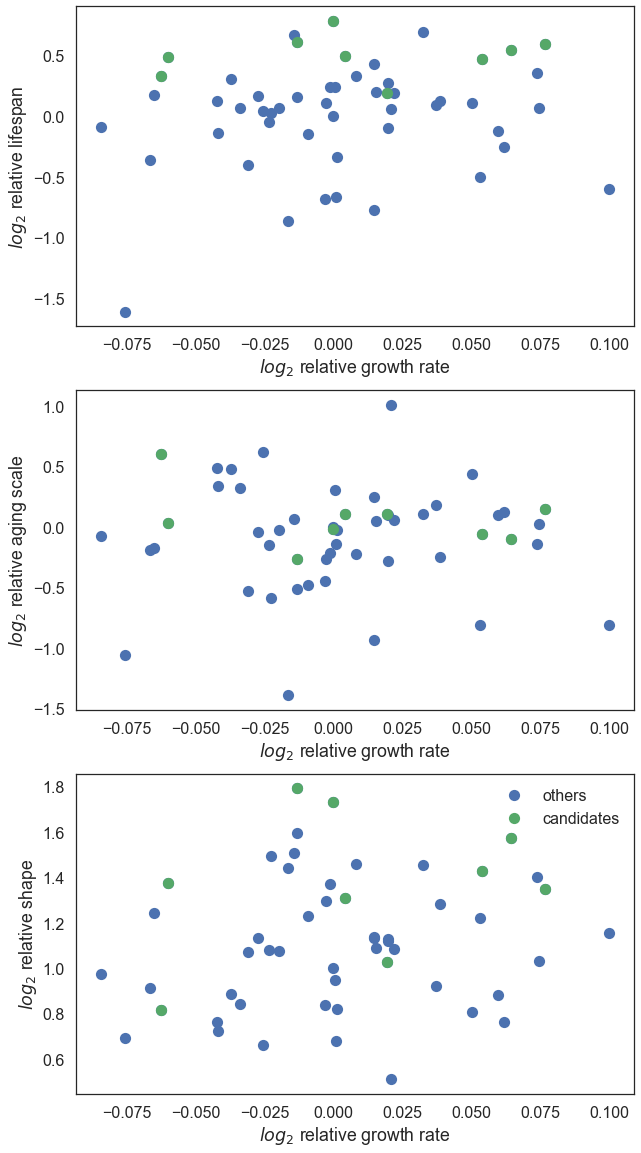

In [56]:
strain_df['growr_ratio_log2'] = [np.log2(float(r)/strain_df.loc['WT','growr_mean']) for r in strain_df['growr_mean']]
strain_df['growr_ratio'] = [float(r)/strain_df.loc['WT','growr_mean'] for r in strain_df['growr_mean']]

f, (ax3, ax1, ax2) = plt.subplots(3, sharex=False)

ax1.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         strain_df.loc[initial_strains, 'scale_ratio_log2'],
         'o',label='others')
ax1.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         strain_df.loc[candidates, 'scale_ratio_log2'], 'o', label='candidates')
ax1.set_ylabel('$log_2$ relative aging scale')
ax1.set_xlabel('$log_2$ relative growth rate')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax2.legend(loc=4)


ax2.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         np.power(2,strain_df.loc[initial_strains, 'shape_ratio_log2']),
         'o',label='others')
ax2.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         np.power(2,strain_df.loc[candidates, 'shape_ratio_log2']), 'o', label='candidates')
ax2.set_xlabel('$log_2$ relative growth rate')
ax2.set_ylabel('$log_2$ relative shape ')
#ax2.plot(np.arange(3,-4,-0.1), np.arange(-3,4,0.1), '--', label='equal lifespan')
#ax2.plot(np.arange(4,-4,-0.1), [0]*80, '--')
ax2.legend(loc=1)

#ax1.set_xlim([-1.5,1.5])
#ax2.set_xlim([-1.5,1.5])
#ax1.set_ylim([-1.6,0.9])
#ax2.set_ylim([-1,1.5])

ax3.plot(strain_df.loc[initial_strains, 'growr_ratio_log2'], 
         strain_df.loc[initial_strains, 'lifespan_ratio_log2'],
         'o',label='others')
ax3.plot(strain_df.loc[candidates, 'growr_ratio_log2'],
         strain_df.loc[candidates, 'lifespan_ratio_log2'], 'o', label='candidates')
ax3.set_ylabel('$log_2$ relative lifespan')
ax3.set_xlabel('$log_2$ relative growth rate')
#ax1.plot(np.arange(4,-4,-0.1), [0]*80, '--')
#ax1.plot(np.arange(2,-3,-0.1), np.arange(2,-3,-0.1), '--', label='equal shape')
#ax3.legend(loc=4)

f.set_size_inches(10,20)

### 8.3 Strains with extreme growth rates: are growth rate estimates correct?

In [57]:
strain_df.loc[strain_df['growr_ratio_log2']>1,['growr_ratio_log2','scale_ratio_log2','lifespan_ratio_log2','shape_ratio_log2']]

,growr_ratio_log2,scale_ratio_log2,lifespan_ratio_log2,shape_ratio_log2


In [58]:
strain_df.loc[strain_df['growr_ratio_log2']<-0.75,['growr_ratio_log2','scale_ratio_log2','lifespan_ratio_log2','shape_ratio_log2']]

,growr_ratio_log2,scale_ratio_log2,lifespan_ratio_log2,shape_ratio_log2
